% inside Gaussian case:  0.93
% inside skewed case:  0.93


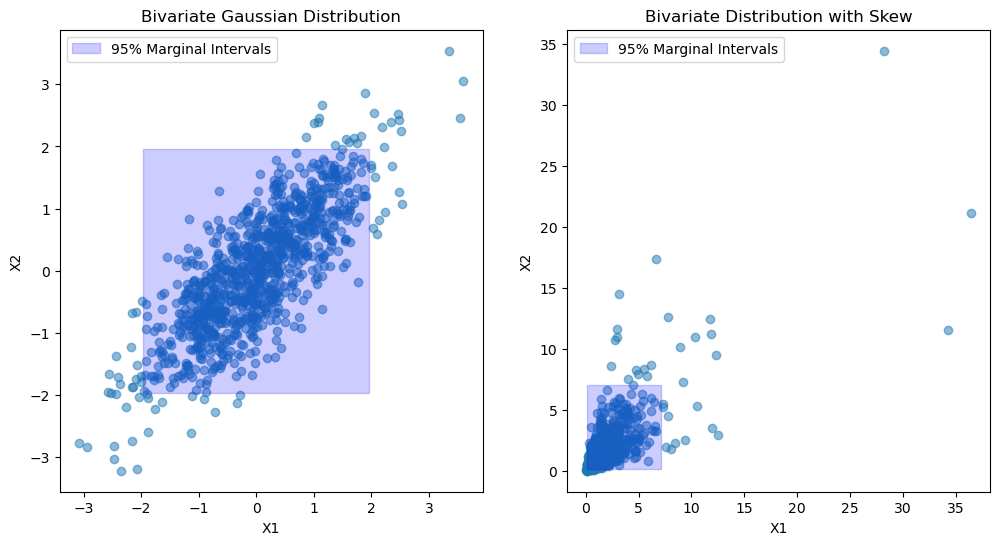

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm
from matplotlib.patches import Ellipse
from shapely.geometry import Point, Polygon

# Parameters
n = 1000
mean = [0, 0]
correlation = 0.8
cov = [[1, correlation], [correlation, 1]]  # Identity covariance matrix

# Generate data for Gaussian case
data_gaussian = np.random.multivariate_normal(mean, cov, size=n)

x1_interval = [norm.ppf(0.025), norm.ppf(0.975)]
x2_interval = [norm.ppf(0.025), norm.ppf(0.975)]

region = Polygon(
    np.array([
        [x1_interval[0], x2_interval[0]],
        [x1_interval[0], x2_interval[1]],
        [x1_interval[1], x2_interval[1]],
        [x1_interval[1], x2_interval[0]]
    ])
)

is_inside = []
for point in data_gaussian:
    point = Point(point)
    is_inside.append(region.contains(point))
is_inside = np.array(is_inside)
    
print('% inside Gaussian case: ', len(np.where(is_inside)[0])/len(is_inside))


# Generate data for skewed case
data_skewed = np.column_stack([
    np.exp(data_gaussian[:,0]),
#     data_gaussian[:,1],
    np.exp(data_gaussian[:,1]),
])

x1_interval_skewed = np.exp(x1_interval)
# x2_interval_skewed = x2_interval
x2_interval_skewed = np.exp(x2_interval)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

region = Polygon(
    np.array([
        [x1_interval_skewed[0], x2_interval_skewed[0]],
        [x1_interval_skewed[0], x2_interval_skewed[1]],
        [x1_interval_skewed[1], x2_interval_skewed[1]],
        [x1_interval_skewed[1], x2_interval_skewed[0]]
    ])
)

is_inside_skewed = []
for point in data_skewed:
    point = Point(point)
    is_inside_skewed.append(region.contains(point))
is_inside_skewed = np.array(is_inside_skewed)
    
print('% inside skewed case: ', len(np.where(is_inside_skewed)[0])/len(is_inside_skewed))

# Gaussian Case
axes[0].scatter(data_gaussian[:, 0], data_gaussian[:, 1], alpha=0.5)
axes[0].set_title('Bivariate Gaussian Distribution')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

# Plot 95% marginal intervals
axes[0].add_patch(plt.Rectangle((x1_interval[0], x2_interval[0]), 
                                 x1_interval[1] - x1_interval[0], 
                                 x2_interval[1] - x2_interval[0], 
                                 color='b', alpha=0.2, label='95% Marginal Intervals'))

# Skewed Case
axes[1].scatter(data_skewed[:, 0], data_skewed[:, 1], alpha=0.5)
axes[1].set_title('Bivariate Distribution with Skew')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

# Plot 95% marginal intervals for skewed data

axes[1].add_patch(plt.Rectangle((x1_interval_skewed[0], x2_interval_skewed[0]), 
                                 x1_interval_skewed[1] - x1_interval_skewed[0], 
                                 x2_interval_skewed[1] - x2_interval_skewed[0], 
                                 color='b', alpha=0.2, label='95% Marginal Intervals'))

# Labels
axes[0].legend()
axes[1].legend()

